Table 'sales' already exists. SQL script not executed.

Sales Summary (matches SQL result):
product_name  total_qty  revenue
   Product A         12    306.0
   Product B          8    320.0
   Product C          7    210.0


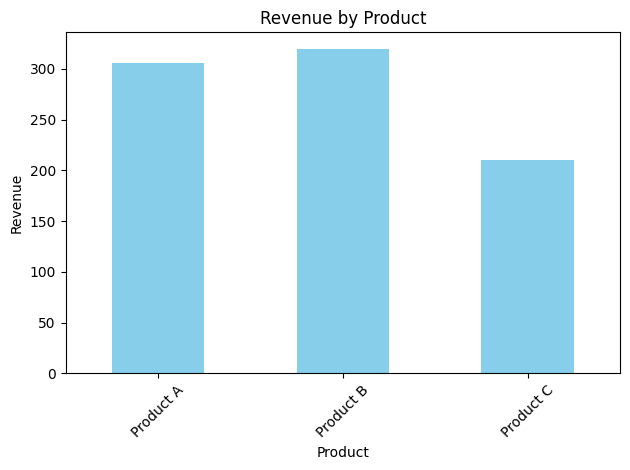

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os

# File paths
db_path = r'E:\excell files\intership projects\Get Basic Sales Summary from a Tiny SQLite Database using Python task 7\sales_data.db'
sql_file_path = r'E:\excell files\intership projects\Get Basic Sales Summary from a Tiny SQLite Database using Python task 7\sales_data.sql'

conn = sqlite3.connect(db_path)
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='sales';")
table_exists = cursor.fetchone()

if not table_exists:
    with open(sql_file_path, 'r') as file:
        sql_script = file.read()
    cursor.executescript(sql_script)
    conn.commit()
    print("SQL script executed. Table 'sales' created.")
else:
    print("Table 'sales' already exists. SQL script not executed.")

query = '''
SELECT product_name, 
       SUM(CAST(quantity AS INTEGER)) AS total_qty, 
       SUM(CAST(quantity AS REAL) * CAST(price AS REAL)) AS revenue
FROM sales
GROUP BY product_name
ORDER BY product_name;
'''

df = pd.read_sql_query(query, conn)

df['revenue'] = df['revenue'].round(2)

print("\nSales Summary (matches SQL result):")
print(df.to_string(index=False))


if df.empty:
    print("\nNo data to plot.")
else:
    df.plot(kind='bar', x='product_name', y='revenue', legend=False, color='skyblue')
    plt.title("Revenue by Product")
    plt.ylabel("Revenue")
    plt.xlabel("Product")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("sales_chart.png")
    plt.show()

conn.close()
